# Heart disease analysis Using different model

In the dataset we have some patient clinical report, We have to predict they have heart disease or not?

# Load the data

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("heart.csv")

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


# Data Description

 **1. age**: The person's age in years

 **2. sex**: The person's sex (1 = male, 0 = female)

 **3. cp**: Chest pain type 
            * 0: Typical angina: chest pain related decrease blood supply to the heart
            * 1: Atypical angina: chest pain not related to heart
            * 2: Non-anginal pain: typically esophageal spasms (non heart related)
            * 3: Asymptomatic: chest pain not showing signs of disease
            
**4. trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**5. chol**: The person's cholesterol measurement in mg/dl

**6. fbs**: the perdon's fasting blood sugar > 120 mg/dl. (1 = true; 0 = false)

**7. restecg**: Resting electrocardiographic results

     0: Nothing to note
     1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
     2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
        
**8. thalach**: Maximum heart rate achieved

**9. exang**: Exercise induced angina (1 = yes; 0 = no)

**10. oldpeak**: - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**11. slope**: - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
    
**12. ca**: Number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
    
**13. thal**: Thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
    
**14. target**: Person have disease or not (1=yes, 0=no) (= the predicted attribute)

In [48]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [49]:
df.shape

(303, 14)

# Feature Selection

### Univariate selection

Univariate feature selection examines each feature individually to determine the strength of the relationship of the feature with the response variable.

In [50]:
#X= df.drop(['target'], axis=1)
#y= df['target']
x = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [52]:
BestFeature = SelectKBest(score_func=f_classif, k=10)
fit = BestFeature.fit(x,y)

In [53]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [94]:
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']

In [95]:
featureScores

,Column,Score
0,age,16.12
1,sex,25.79
2,cp,69.77
3,trestbps,6.46
4,chol,2.20
5,fbs,0.24
6,restecg,5.78
7,thalach,65.12
8,exang,70.95
9,oldpeak,68.55


In [56]:
print(featureScores.nlargest(10,'Score'))

      Column  Score
8      exang  70.95
2         cp  69.77
9    oldpeak  68.55
7    thalach  65.12
11        ca  54.56
10     slope  40.90
12      thal  40.41
1        sex  25.79
0        age  16.12
3   trestbps   6.46


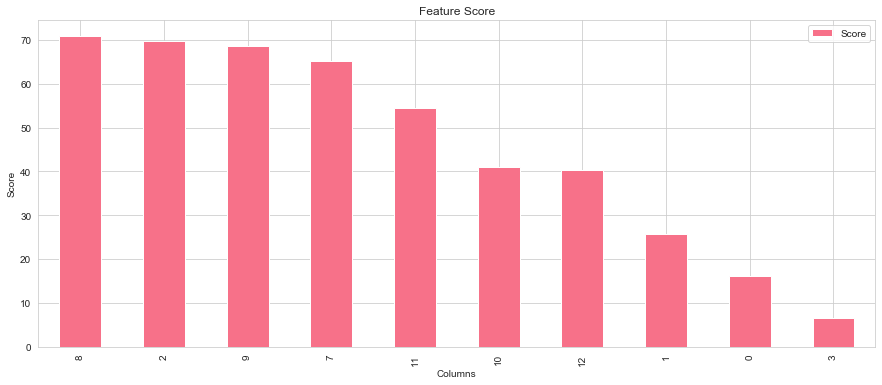

In [124]:
featureScores.nlargest(10,'Score').plot(kind='bar',figsize=(15,6),color=sns.color_palette("husl"))
plt.xlabel('Columns')
plt.ylabel('Score')
plt.title('Feature Score')
plt.show()

# Scalling The Data

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [99]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.95,0.68,1.97,145,233,1,0,0.02,-0.70,1.09,-2.27,-0.71,-2.15,1
1,-1.92,0.68,1.00,130,250,0,1,1.63,-0.70,2.12,-2.27,-0.71,-0.51,1
2,-1.47,-1.47,0.03,130,204,0,0,0.98,-0.70,0.31,0.98,-0.71,-0.51,1
3,0.18,0.68,0.03,120,236,0,1,1.24,-0.70,-0.21,0.98,-0.71,-0.51,1
4,0.29,-1.47,-0.94,120,354,0,1,0.58,1.44,-0.38,0.98,-0.71,-0.51,1


In [59]:
X= df.drop(['target','trestbps','chol','fbs','restecg'], axis=1)
y= df['target']

In [60]:
#devide Dataset into test and train
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [61]:
#check those dataset
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 1908
X_test- 819
y_train- 212
y_test- 91


# Logistic regration

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model1 = lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction1)
cm

array([[37,  3],
       [ 3, 48]], dtype=int64)

Details of confusion matricx
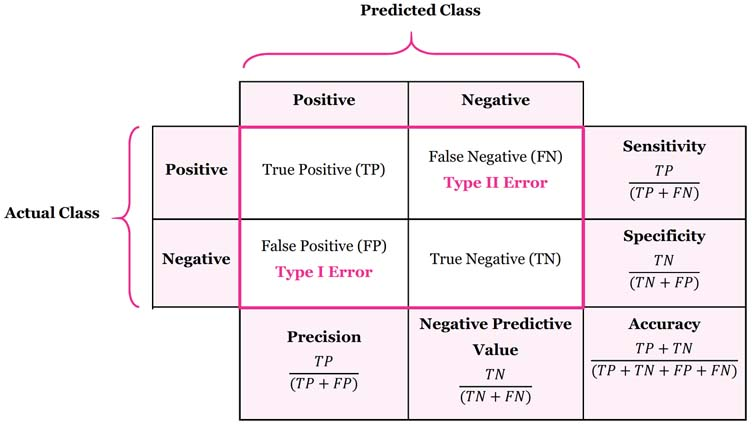

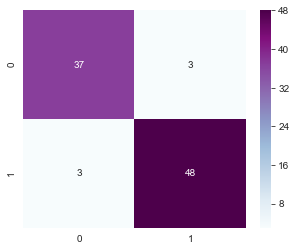

In [64]:
plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="BuPu")


In [65]:
#Accuricy using matrics
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9340659340659341


In [66]:
from sklearn.metrics import accuracy_score

accuracies = {}

acc = accuracy_score(y_test,prediction1)*100
accuracies['Logistic Regration'] = acc
acc

93.4065934065934

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.94      0.94      0.94        51

    accuracy                           0.93        91
   macro avg       0.93      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



# Dicision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model2 = dtc.fit(X_train,y_train)
prediction2 = model2.predict(X_test)

In [69]:
cm2 = confusion_matrix(y_test,prediction2)
cm2

array([[27, 13],
       [12, 39]], dtype=int64)

In [70]:
acc = accuracy_score(y_test,prediction2)*100
accuracies['Dicision Tree'] = acc
acc

72.52747252747253

In [71]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68        40
           1       0.75      0.76      0.76        51

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91



# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3 = confusion_matrix(y_test, prediction3)
cm3

array([[34,  6],
       [ 8, 43]], dtype=int64)

In [73]:
acc = accuracy_score(y_test, prediction3)*100
accuracies['Random Forest'] = acc
acc

84.61538461538461

In [74]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        40
           1       0.88      0.84      0.86        51

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.85      0.85      0.85        91



# Support Vector machine

In [75]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[34,  6],
       [ 4, 47]], dtype=int64)

In [76]:
acc = accuracy_score(y_test, prediction4)*100
accuracies['Support Vector Machine'] = acc
acc

89.01098901098901

In [77]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.89      0.92      0.90        51

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



# Gaussion NB

In [78]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)
cm5

array([[36,  4],
       [ 7, 44]], dtype=int64)

In [79]:
acc = accuracy_score(y_test, prediction5)*100
accuracies['Gaussion NB'] = acc
acc

87.91208791208791

In [80]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        40
           1       0.92      0.86      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



# K nearest neighbor

In [81]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6= confusion_matrix(y_test, prediction5)
cm6

array([[36,  4],
       [ 7, 44]], dtype=int64)

In [82]:
acc = accuracy_score(y_test, prediction6)*100
accuracies['K nearest neighbor'] = acc
acc

89.01098901098901

In [83]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.90      0.90      0.90        51

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



# Comparing Model

In [84]:
print('Logistic Regration - lr :', accuracy_score(y_test, prediction1) * 100)
print('Dicission Tree - dtc :', accuracy_score(y_test, prediction2) * 100)
print('Random Forrest - rfc :', accuracy_score(y_test, prediction3) * 100)
print('Support vector Machine - svm: ', accuracy_score(y_test, prediction4) * 100)
print('Gaussion NB - NB :', accuracy_score(y_test, prediction5) * 100)
print('K Nearest - KNN :', accuracy_score(y_test, prediction6) * 100)

Logistic Regration - lr : 93.4065934065934
Dicission Tree - dtc : 72.52747252747253
Random Forrest - rfc : 84.61538461538461
Support vector Machine - svm:  89.01098901098901
Gaussion NB - NB : 87.91208791208791
K Nearest - KNN : 89.01098901098901


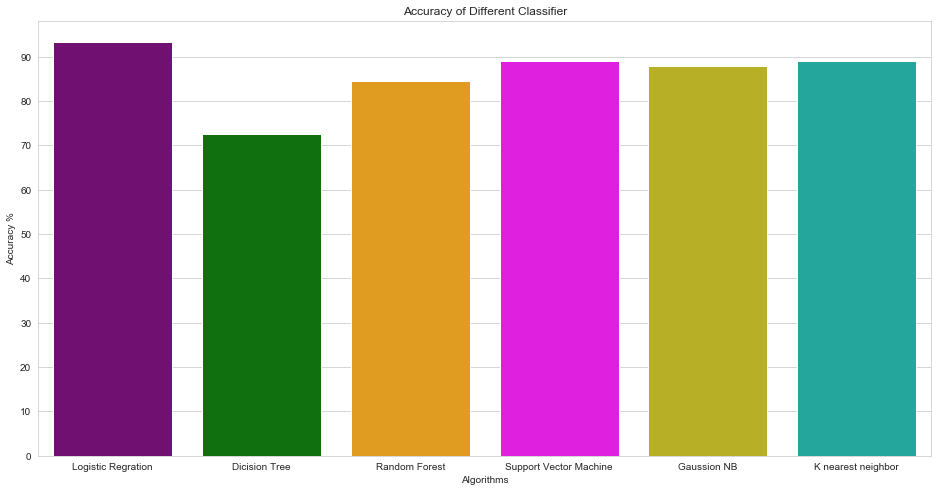

In [85]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.title("Accuracy of Different Classifier")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

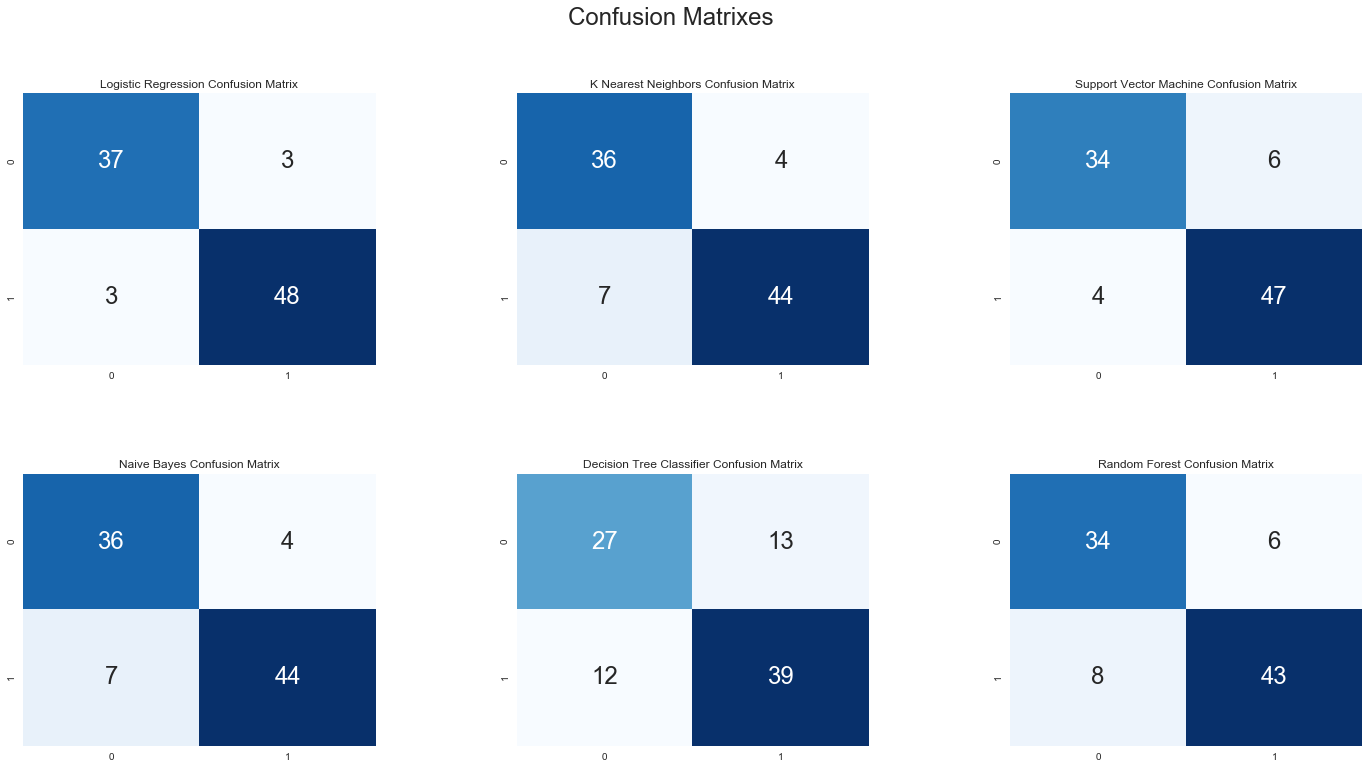

In [86]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.show()